In [2]:
import pandas as pd
import numpy as np
import random
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.environ import SolverFactory
import yfinance as yf
import matplotlib.pyplot as plt

In [129]:
# lista_ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'WEGE3.SA',
#        'B3SA3.SA', 'BBAS3.SA', 'RENT3.SA', 'PRIO3.SA', 'SUZB3.SA', 'GGBR4.SA',
#        'CSNA3.SA', 'GOAU4.SA', 'RADL3.SA', 'ENEV3.SA', 'EQTL3.SA', 'FLRY3.SA',
#        'HAPV3.SA', 'MGLU3.SA', '^BVSP']

lista_ativos = [
    'VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'PETR3.SA', 'BBDC4.SA', 
    'BBAS3.SA', 'ABEV3.SA', 'B3SA3.SA', 'ITSA4.SA', 
    'WEGE3.SA', 'RENT3.SA',  'LREN3.SA', 'GGBR4.SA', 
    'MGLU3.SA', 'RADL3.SA', 'VIVT3.SA', 'BBSE3.SA', 'BPAC11.SA', 
    'EQTL3.SA', 'CSAN3.SA',  'RAIL3.SA', 
     'HAPV3.SA', 'RDOR3.SA',  'CMIG4.SA', 
    'SBSP3.SA',  'PRIO3.SA', 'EGIE3.SA', 
    'KLBN11.SA', 'TOTS3.SA', 'CPFE3.SA', 'CYRE3.SA', 'CSNA3.SA', 
    'GOAU4.SA', 'USIM5.SA', 'BRAP4.SA', 'MRVE3.SA', 'MULT3.SA', 
    'BEEF3.SA', 'YDUQ3.SA', 'COGN3.SA', 'AZUL4.SA'
]

# lista_ativos = random.sample(lista_ativos,20)

print("-----------COMEÇANDO---------")


#DADOS DOS ATIVOS
mydf = pd.DataFrame()
for ativo in lista_ativos:
    mydf[ativo] = yf.download(ativo, period="1y")["Close"]

# # linhas = mydf.shape[0]
# retornos = (mydf / mydf.shift(1))-1
# retorno_media = retornos.mean()*linhas
# retorno_media = retorno_media + 1

retornos = (mydf / mydf.shift(1))-1
retornos_media = retornos.mean()*250
# retornos_media 


#DADOS DO IBOV
mydf_ibov = pd.DataFrame()
mydf_ibov['IBOV'] = yf.download('^BVSP', period="1y")["Close"]

# linha_ibov = mydf_ibov.shape[0]
# # retorno_ibov = (mydf_ibov / mydf_ibov.shift(1)) - 1
# # retorno_ibov_media = retorno_ibov.mean()*linha_ibov
retorno_ibov = (mydf_ibov / mydf_ibov.shift(1)) - 1
retorno_ibov_media = retorno_ibov.mean()*250
# retorno_ibov_media

#--------------------------FILTROS DE DATAFRAME
#----------------- A ideia é pegar a diferença de retorno médio do ativo para o ibov e classificar em 0 e 1 através de regras alteráveis \
# \ gravando na variavel COD [0,1]
#--------- Usei a função APPLY 



-----------COMEÇANDO---------


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [183]:
diferenca_ativo_ibov = retornos_media - float(retorno_ibov_media.iloc[0])

ver_menor = 0.20*float(retorno_ibov_media.iloc[0])
ver_maior = 1.80*float(retorno_ibov_media.iloc[0])
def classificar_cod(valor):
    if valor < ver_menor:
        return 0
    elif ver_menor <= valor <= ver_maior:
        return 1
    elif valor > ver_maior:
        return 0
    else:
        return np.nan # Ou outro valor padrão

cod = diferenca_ativo_ibov.apply(classificar_cod)

# Agora com os códigos dos ativos que preenchem o requisito, irei filtrar a tabela original (retornos_media) e
# trazer só os com COD = 1, posteriormente iremos fazer uma carteira equilibrada e depois uma otimizada

retorno_medio_final = retornos_media[cod[cod==1].index]


#DADOS ENTRADA
valor_total_investir = 100000
tamanho_carteira = cod[cod==1].shape[0]
# maximo_peso_carteira = 0.05
# limite_min = 0.02
# limite_max = 0.12

Tamanho da Carteira: 16
----------------
Bound Inferior: 0.042499999999999996
----------------
           Média de Retorno  Porcentagem da Carteira  Porcentagem Fixa  \
VALE3.SA           0.613543                   0.0425            0.0625   
ITUB4.SA           0.618048                   0.0425            0.0625   
BBDC4.SA           0.694561                   0.1200            0.0625   
ABEV3.SA           0.551958                   0.0425            0.0625   
B3SA3.SA           0.550363                   0.0425            0.0625   
ITSA4.SA           0.636875                   0.0425            0.0625   
RENT3.SA           0.663298                   0.0525            0.0625   
MGLU3.SA           0.650131                   0.0425            0.0625   
VIVT3.SA           0.510283                   0.0425            0.0625   
BPAC11.SA          0.706934                   0.1200            0.0625   
RDOR3.SA           0.539177                   0.0425            0.0625   
SBSP3.SA         

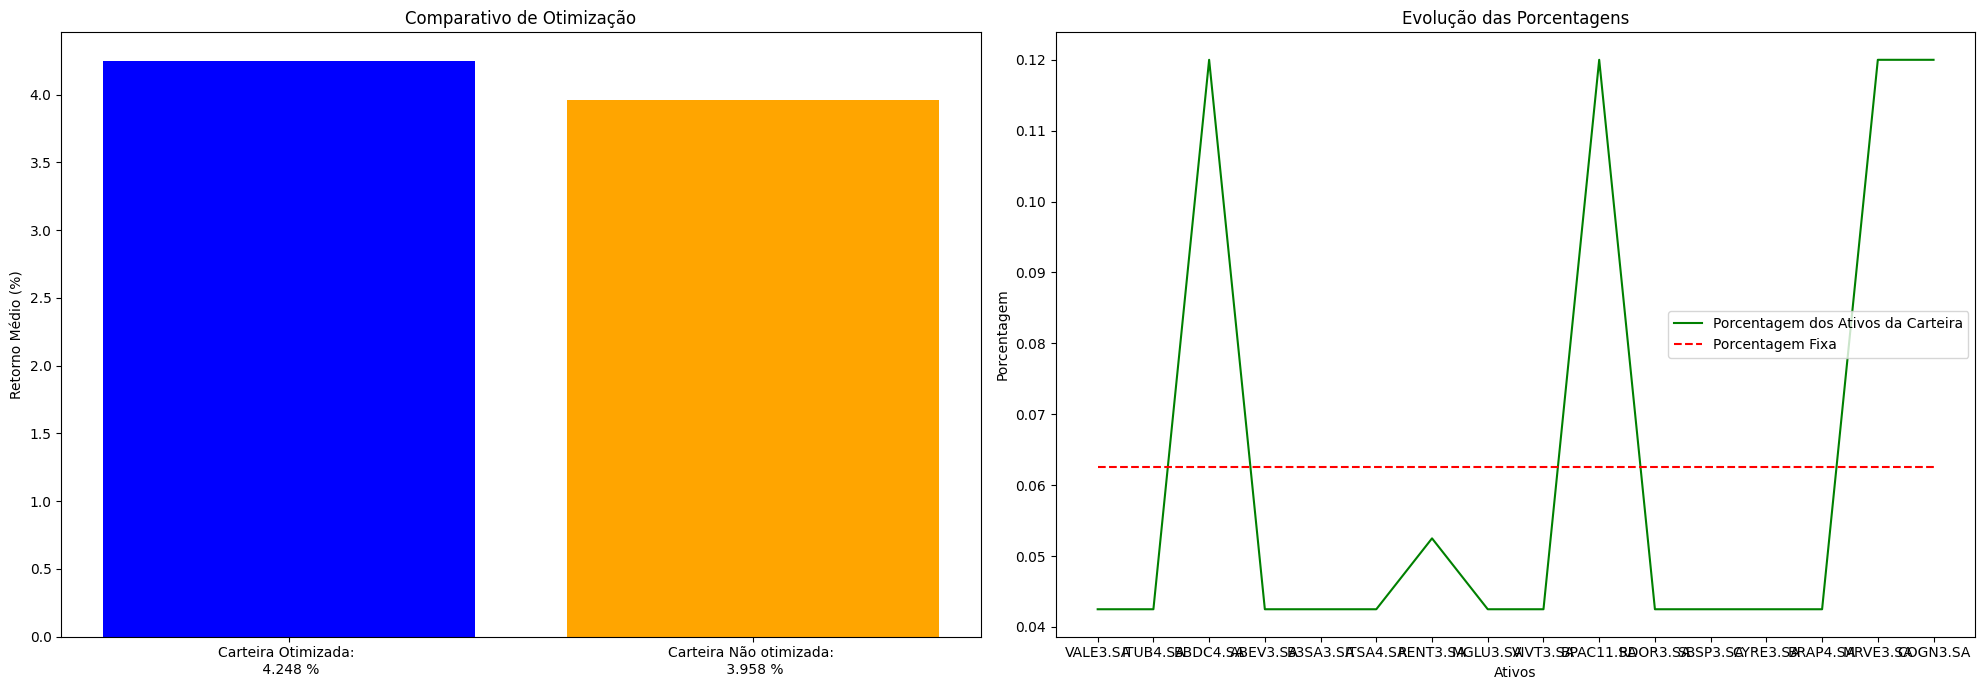

-------FIM----------


In [185]:


#--------------------------- MODELO
model = pyo.ConcreteModel()

#Definindo Variaveis
bound_inferior = ((100/float(tamanho_carteira))/100)-0.02

print(f'Tamanho da Carteira: {tamanho_carteira}')
print('----------------')
print(f'Bound Inferior: {bound_inferior}')
print('----------------')

model.x = pyo.Var(range(tamanho_carteira), bounds=(bound_inferior, None))
x=model.x

#Restrições
model.soma_peso_percent = pyo.Constraint(expr = sum(x[i] for i in range(int(tamanho_carteira))) == 1 )
model.soma_total_investido = pyo.Constraint(expr = sum(x[i] * valor_total_investir for i in range(tamanho_carteira)) <= valor_total_investir)

model.maximo_peso_ativo = pyo.ConstraintList()
for i in range(tamanho_carteira):
    model.maximo_peso_ativo.add(expr = x[i] <= 0.12)

#Objetivo
model.obj = pyo.Objective(expr = sum(x[i] * retorno_medio_final.iloc[i] for i in range(tamanho_carteira)), sense=pyo.maximize)

opt = SolverFactory('cplex', executable='C:\\CPLEX_Studio2211\\cplex\\bin\\x64_win64\\cplex.exe')
resultado = opt.solve(model)

#------------------ FINAL DA MODELAGEM


#------------------ GRAFICOS

df = pd.DataFrame(retorno_medio_final, columns=["Média de Retorno"])
df['Porcentagem da Carteira'] = [pyo.value(x[i]) for i in range(tamanho_carteira)]
df['Porcentagem Fixa'] = ((100/float(tamanho_carteira))/100)


#imprimindo resultados

df['Resultado Carteira Otimizada'] = df['Média de Retorno'] * df['Porcentagem da Carteira']
df['Resultado Carteira Não Otimizada'] = df['Média de Retorno'] * df['Porcentagem Fixa']



print(df)



import matplotlib.pyplot as plt
import numpy as np

# 1. Preparação dos dados (mantendo sua lógica)
lista_resultados = [
    float(df['Resultado Carteira Otimizada'].mean()) * 100, 
    float(df['Resultado Carteira Não Otimizada'].mean()) * 100
]

# 2. Criar a figura com 1 linha e 2 colunas
# figsize=(20, 7) garante que o retângulo seja largo o suficiente para os dois
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# --- GRÁFICO DE BARRAS (Lado Esquerdo - ax1) ---
bar_colors = ['blue', 'orange']
labels = [
    f'Carteira Otimizada: \n {np.round(lista_resultados[0], 3)} %', 
    f'Carteira Não otimizada: \n {np.round(lista_resultados[1], 3)} %'
]

ax1.bar(labels, lista_resultados, color=bar_colors)
ax1.set_ylabel('Retorno Médio (%)')
ax1.set_title('Comparativo de Otimização')

# --- GRÁFICO DE LINHA (Lado Direito - ax2) ---
ax2.plot(df['Porcentagem da Carteira'], label='Porcentagem dos Ativos da Carteira', color='green')
ax2.plot(df['Porcentagem Fixa'], label='Porcentagem Fixa', color='red', linestyle='--')

ax2.set_xlabel('Ativos')
ax2.set_ylabel('Porcentagem')
ax2.set_title('Evolução das Porcentagens')
ax2.legend()

# 3. Ajuste automático para não sobrepor os textos
plt.tight_layout()

# 4. Exibir o resultado final
plt.show()


print("-------FIM----------")
# model.pprint()